# ML Model for Predicting Building  Damages from Earthquake 

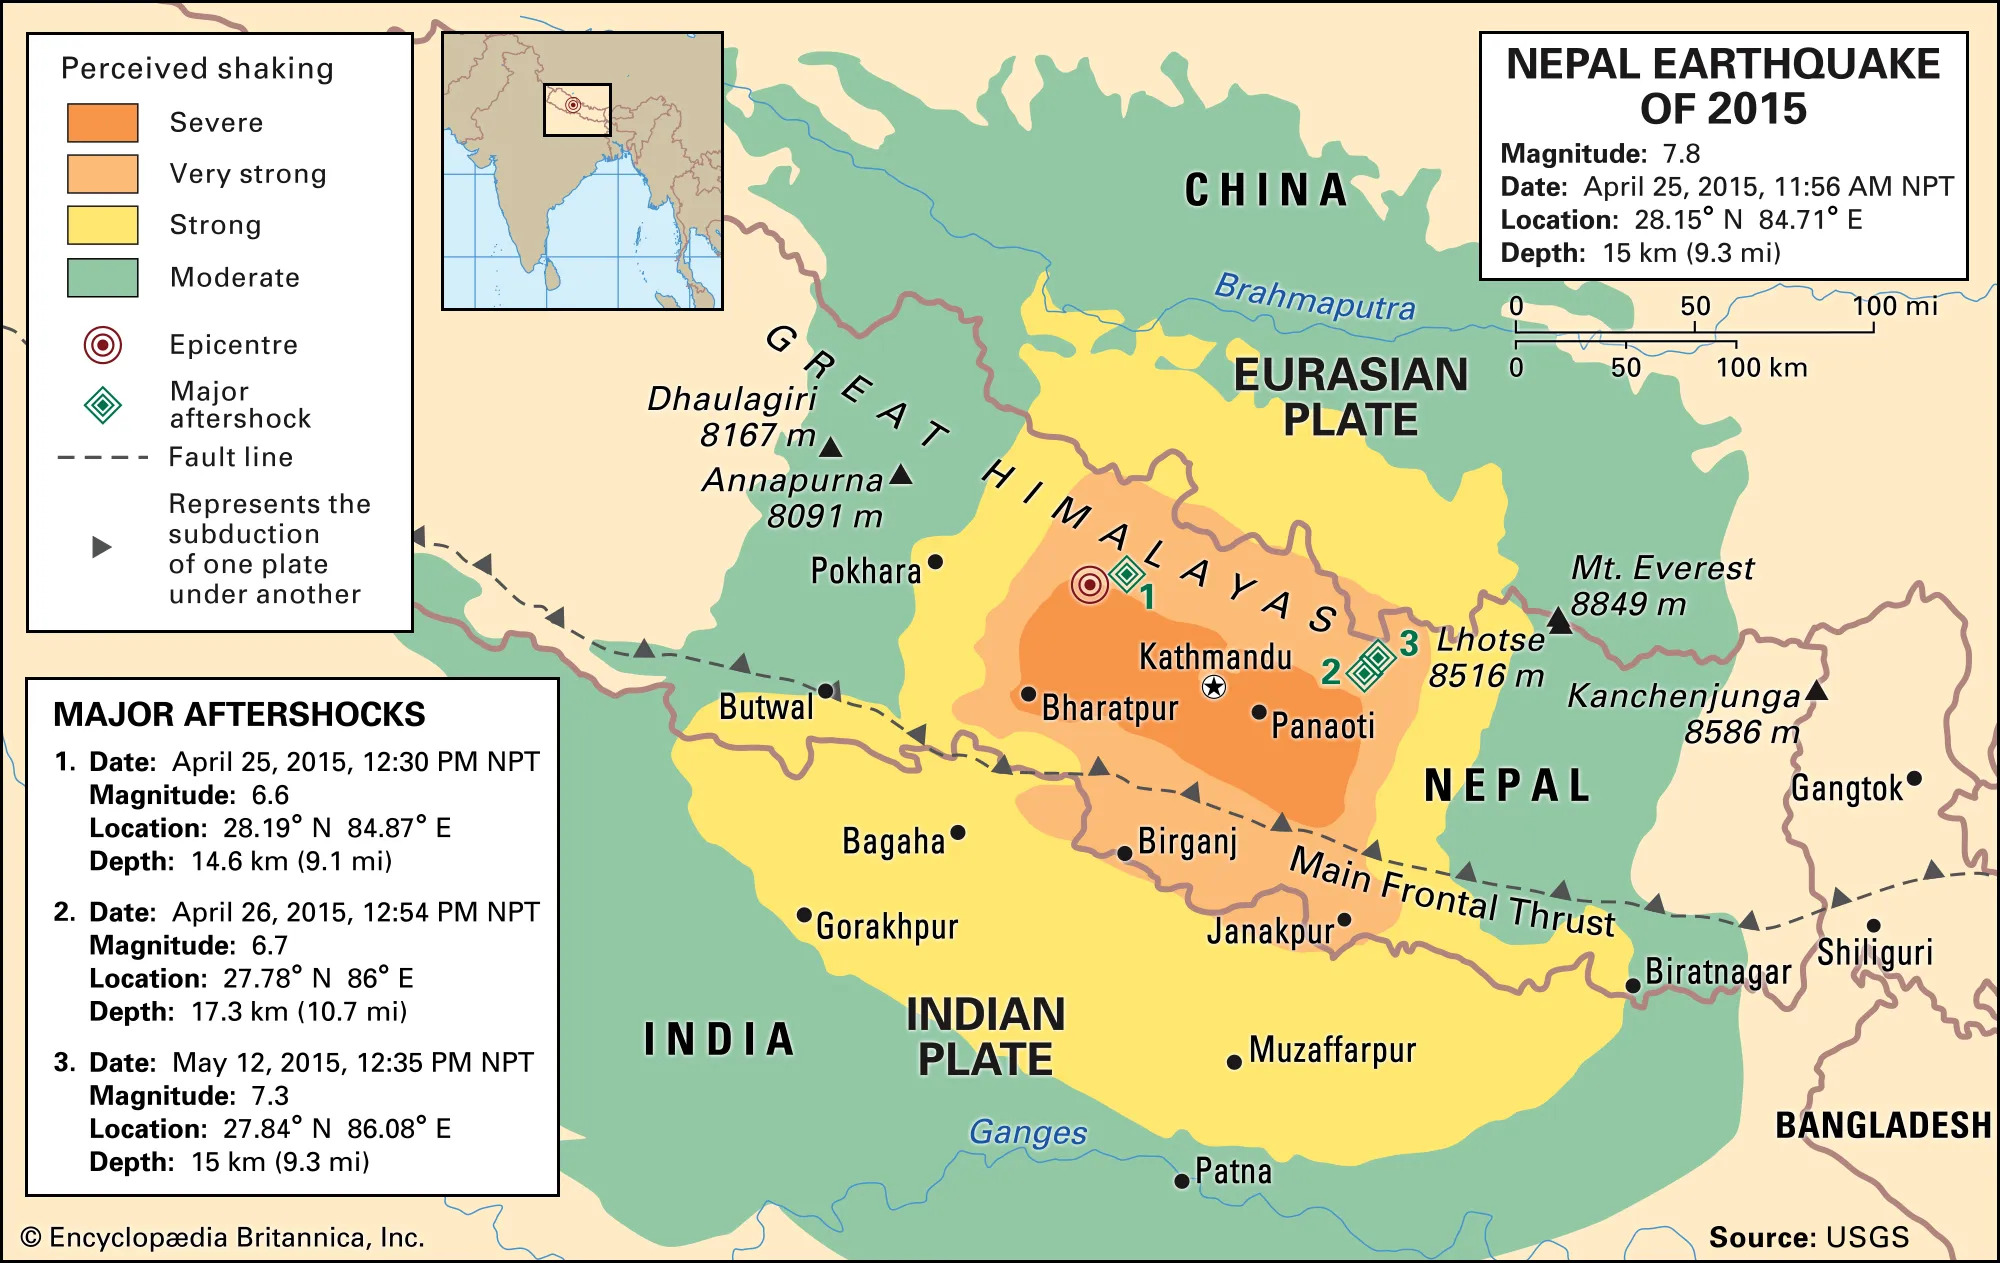

## Problem Statement

**This project is aimed at making use of machine learning to create a model that can predict whether a building has the structural capabilities to withstand an earthquake.**

## Data Collection

In [1]:
# Lets import the common Libraries required before proceeding further,

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The data that is used in this project was extracted from the 2015 Nepal Open Data Portal, and is based on the earthquake that happened in the area of Gorkha,Nepal in 2015 and had a magnitude of 7.8<br>
Data Source: https://eq2015.npc.gov.np/#/

In [2]:
Raw_Data = pd.read_csv(r"C:\Users\APJ\OneDrive\Desktop\csv_building_structure.csv")

In [3]:
Raw_Data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9,288.0,9,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 3
1,1.200000e+11,12,1207,120703,1,15,364.0,9,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 5
2,1.200000e+11,12,1207,120703,1,20,384.0,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2
3,1.200000e+11,12,1207,120703,1,20,312.0,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2
4,1.200000e+11,12,1207,120703,1,30,308.0,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 1


In [4]:
##from google.colab import drive
#drive.mount('/content/drive')

## Data Understanding

#### Feature Description
**count_floors_pre_eq** : The Number of floors building has before earthquake<br>
**age_building** : Age of the building<br>
**plinth_area_sq_ft** : Floor area of a building measured at the basement in square feet<br>
**height_ft_pre_eq** : Height of the building in feet before the earthquake<br>
**land_surface_condition** : Surface condition of the land,(Flat,Moderate Slope,Steep Slope)<br>
**foundation_type** : Type of foundation,(Mud mortar-Stone/Brick, Bamboo/Timber , Cement -Stone/Brick, Reinforced Concrete)<br> 
**roof_type** : Type of Roof,(Bamboo/Timber-Light Roof,Bamboo/Timber-Heavy Roof,RCC/RB/RBC)<br>
**ground_floor_type** : Type of ground floor,(Mud,Reinforced Concrete,Brick/Stone,Timber,Other)<br>
**other_floor_type** : Type of floor in floors except groundfloor and Roof,(Timber/Bamboo-Mud,Timber-Planck,NA,RCC/RB/RBC)<br>
**position** : Not Attached,Attached-1 side,Attached-2 side,Attached-3 side<br>
**plan_configuration** : Overall size and shape of the building<br>

The superstructure is the visible part of a building that sits above ground. It starts from the ground floor to the top of<br> 
the building<br>

**has_superstructure_adobe_mud** : Whether the superstructure was made of Adobe/Mud<br>
**has_superstructure_mud_mortar_stone** : Whether the superstructure was made of Mud Mortar and Stone<br>
**has_superstructure_stone_flag** : Whether the superstructure was made of stone<br>
**has_superstructure_cement_mortar_stone** : Whether the superstructure was made of Cement Mortar - Stone<br>
**has_superstructure_mud_mortar_brick** : Whether the superstructre was made of Mud Mortar - Brick.<br>
**has_superstructure_cement_mortar_brick** : Whether the superstructure was made of Cement Mortar and Brick<br>
**has_superstructure_timber** : Whether  the superstructure was made of Timber<br> 
**has_superstructure_bamboo** : Whether the superstructure was made of Bamboo<br>
**has_superstructure_rc_non_engineered** : Whether the superstructure was made of non-engineered reinforced concrete<br> 
**has_superstructure_rc_engineered** : Whether the superstructure was made of engineered reinforced concrete<br>
**has_superstructure_other** : Whether the superstructure was made of any other material<br>

**damage_grade** : The severity of damage expressed in grades 1 to 5.

In [5]:
# Lets see the random 5 rows of our datset,

Raw_Data.sample(5)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
569152,3.040000e+11,30,3009,300903,3,20,476.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,1,0,0,0,0,Grade 5
89430,2.040000e+11,20,2002,200204,1,3,210.0,8,Flat,Bamboo/Timber,...,0,0,0,0,1,1,0,0,0,Grade 1
55255,2.020000e+11,20,2001,200102,2,22,299.0,16,Flat,Bamboo/Timber,...,0,0,0,0,1,1,0,0,0,Grade 3
312147,2.380000e+11,23,2309,230907,3,12,420.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
170095,2.200000e+11,22,2202,220203,3,12,225.0,19,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5


In [6]:
# Shape of the data,

Raw_Data.shape

(762106, 27)

In [7]:
# Datatype of features,

Raw_Data.dtypes

building_id                               float64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                                int64
plinth_area_sq_ft                         float64
height_ft_pre_eq                            int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [8]:
# Meta Information,

Raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             762106 non-null  float64
 1   district_id                             762106 non-null  int64  
 2   vdcmun_id                               762106 non-null  int64  
 3   ward_id                                 762106 non-null  int64  
 4   count_floors_pre_eq                     762106 non-null  int64  
 5   age_building                            762106 non-null  int64  
 6   plinth_area_sq_ft                       762078 non-null  float64
 7   height_ft_pre_eq                        762106 non-null  int64  
 8   land_surface_condition                  762106 non-null  object 
 9   foundation_type                         762106 non-null  object 
 10  roof_type                               7620

In [9]:
# Statistical summary of numerical features,

Raw_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,762106.0,2.607908e+11,5.801505e+10,1.200000e+11,2.220000e+11,2.460000e+11,3.040000e+11,3.670000e+11
district_id,762106.0,2.576784e+01,5.807555e+00,1.200000e+01,2.200000e+01,2.400000e+01,3.000000e+01,3.600000e+01
vdcmun_id,762106.0,2.582688e+03,5.811728e+02,1.201000e+03,2.204000e+03,2.410000e+03,3.010000e+03,3.611000e+03
ward_id,762106.0,2.582743e+05,5.811735e+04,1.201010e+05,2.204020e+05,2.410040e+05,3.010060e+05,3.611080e+05
count_floors_pre_eq,762106.0,2.087783e+00,6.551014e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
age_building,762106.0,2.432640e+01,6.504370e+01,0.000000e+00,9.000000e+00,1.600000e+01,2.700000e+01,9.990000e+02
plinth_area_sq_ft,762078.0,4.066730e+02,2.267827e+02,7.000000e+01,2.800000e+02,3.580000e+02,4.700000e+02,5.000000e+03
height_ft_pre_eq,762106.0,1.604937e+01,5.493878e+00,6.000000e+00,1.200000e+01,1.600000e+01,1.800000e+01,9.900000e+01
has_superstructure_adobe_mud,762106.0,4.240093e-02,2.015022e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_superstructure_mud_mortar_stone,762106.0,8.002706e-01,3.997972e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
# Statistical summary of catergorical features,

Raw_Data.describe(include='object')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,damage_grade
count,762106,762106,762080,762106,762106,762105,762105,762094
unique,3,5,3,5,4,4,10,5
top,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Grade 5
freq,631675,628716,503722,618217,486907,604453,731257,275766


In [11]:
# Displaying the categorical features
Raw_Data.select_dtypes(include="object").columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade'],
      dtype='object')

In [12]:
# Displaying the numerical features
Raw_Data.select_dtypes(exclude="object").columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')

## Data Cleaning

### 1.Handling Null Values

In [13]:
# Lets see if there is any null values in the data,

Raw_Data.isnull().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

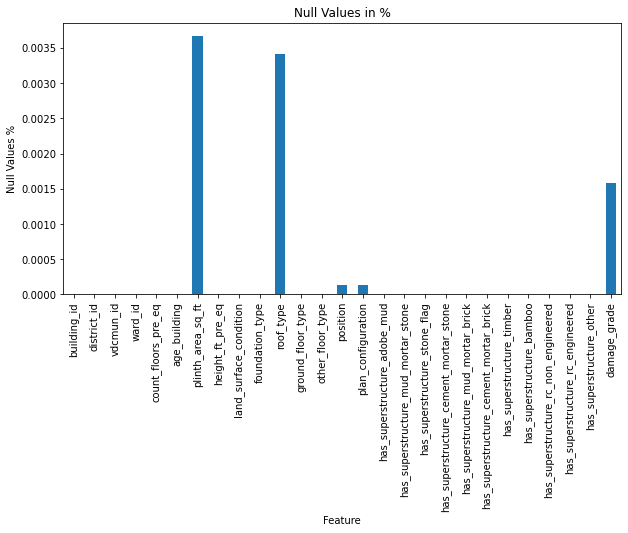

In [14]:
# Percentage of Null values in each column,

plt.figure(figsize=(10,5))
((Raw_Data.isnull().sum()/len(Raw_Data))*100).plot(kind='bar')
plt.title("Null Values in %")
plt.xlabel('Feature')
plt.ylabel('Null Values %')
plt.show()

In [15]:
# There are 5 columns with null values
# The percentage of null values is very less

##### Handling the missing value in plinth area column

In [16]:
# Visualizing the distribution of plinth area column,

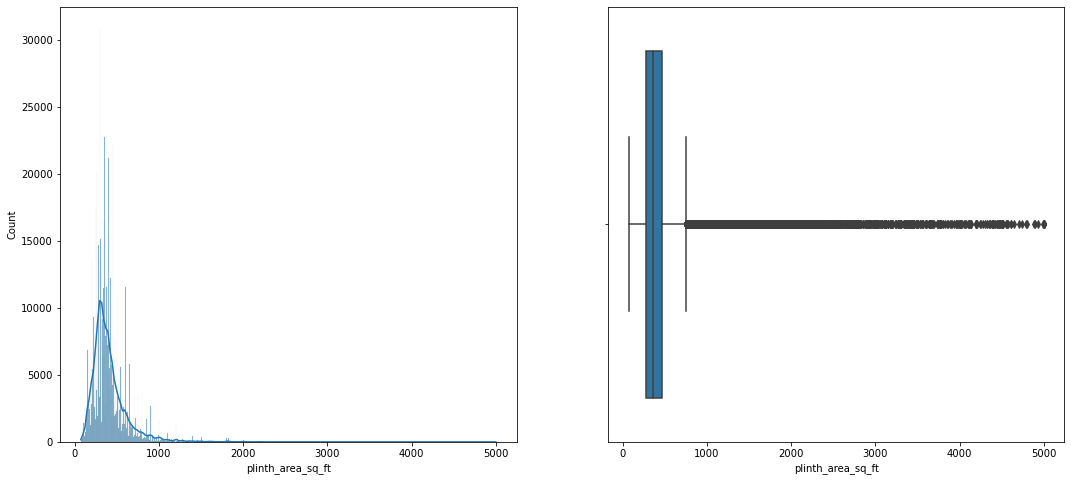

In [17]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=Raw_Data['plinth_area_sq_ft'],kde=True,data=Raw_Data,ax=my_grid[0])
g2 = sns.boxplot(x=Raw_Data['plinth_area_sq_ft'],data=Raw_Data,ax=my_grid[1])

In [18]:
# The plinth area is a contionus numeric feature and has a lot of outliers, hence we will have to choose 
# a method that will not have the affect of outliers

Text(0.5, 1.0, 'Variation of Plinth Area in different Roof Types')

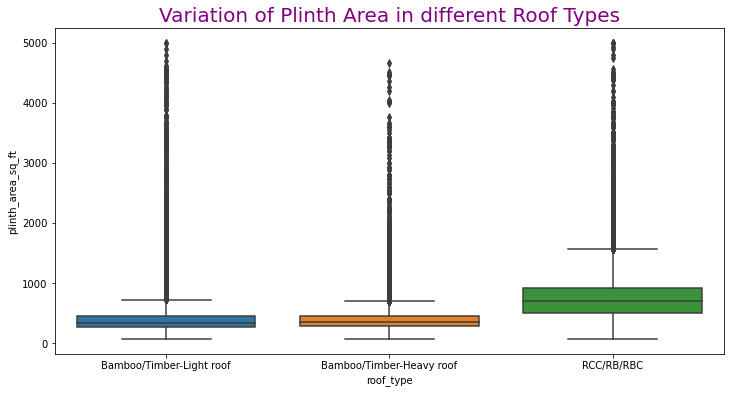

In [19]:
# Checking relation between Plinth area and Roof type,

plt.figure(figsize=(12,6))
sns.boxplot(x=Raw_Data['roof_type'],y=Raw_Data['plinth_area_sq_ft'],data=Raw_Data)
plt.title("Variation of Plinth Area in different Roof Types",fontsize=20,color='purple')

In [20]:
# As we can see the type of roof of a building has a profound effect on the plinth area
# Due to the presence of outliers, we will use median to find the replacement of null value

In [21]:
Raw_Data.groupby('roof_type').median()['plinth_area_sq_ft']

roof_type
Bamboo/Timber-Heavy roof    360.0
Bamboo/Timber-Light roof    345.0
RCC/RB/RBC                  700.0
Name: plinth_area_sq_ft, dtype: float64

In [22]:
# Creating a function to choose the median valuw wrt roof type,

def impute_plinth_area(cols):
    rtype=cols[0]
    plinth=cols[1]
    if pd.isnull(plinth):
        if rtype == "Bamboo/Timber-Heavy roof" :
            return 360
        elif rtype == "Bamboo/Timber-Light roof" :
            return 345
        elif rtype == "RCC/RB/RBC" :
            return 700
    else:
        return plinth

# Filling the null values in plinth area,

Raw_Data['plinth_area_sq_ft'] = Raw_Data[['roof_type','plinth_area_sq_ft']].apply(impute_plinth_area,axis=1)

###### Handling the Null values in Roof type column

Text(0.5, 1.0, 'Roof Types')

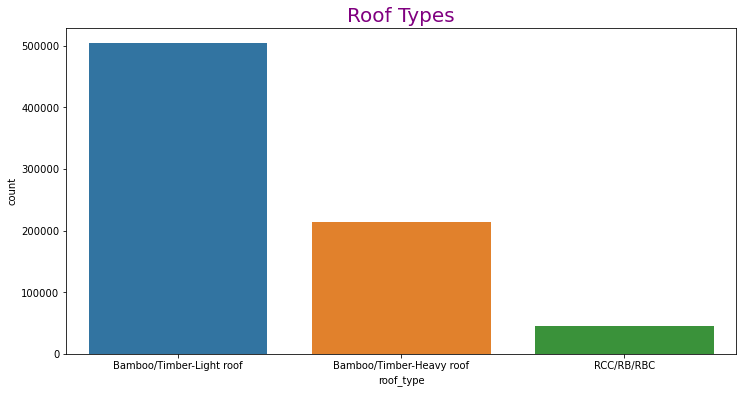

In [23]:
# Vizualising the distribution of roof type column, 

plt.figure(figsize=(12,6))
sns.countplot(x=Raw_Data['roof_type'],data=Raw_Data)
plt.title("Roof Types",fontsize=20,color='purple')

In [24]:
# As this is a ctegorical column, we can replace the missing values in this column using mode

In [25]:
Raw_Data['roof_type'] = Raw_Data['roof_type'].fillna(Raw_Data['roof_type'].mode()[0])

###### Handling Null Value in Position,Position Configuration and Damage Grade


In [26]:
# As the percentage of missing values is really less in all the 3 columns, we can drop the rows containing NaN

Raw_Data.dropna(inplace=True)

In [27]:
# Lets verify whether all the NaN values have been dealt with,

Raw_Data.isnull().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [28]:
# We have sucessfully handled all the missing values in the data

### 2.Handling Duplicate Entries

In [29]:
# Displaying the duplicate rows,

Raw_Data[Raw_Data.duplicated()]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
262,1.200000e+11,12,1207,120703,2,3,322.0,16,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
348,1.200000e+11,12,1207,120703,1,26,322.0,9,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 3
373,1.200000e+11,12,1207,120703,2,10,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
377,1.200000e+11,12,1207,120703,2,15,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 2
378,1.200000e+11,12,1207,120703,2,24,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762037,3.670000e+11,36,3603,360302,2,5,360.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762047,3.670000e+11,36,3603,360302,2,80,483.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762078,3.670000e+11,36,3603,360302,2,20,378.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762087,3.670000e+11,36,3603,360302,2,35,550.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5


In [30]:
# We can drop these duplicate entries from our data,

Raw_Data.drop_duplicates(inplace=True)

In [31]:
# Verifying whether all the duplicated entries have been droped,

Raw_Data.duplicated().sum()

0

## Exploratory Data Analysis

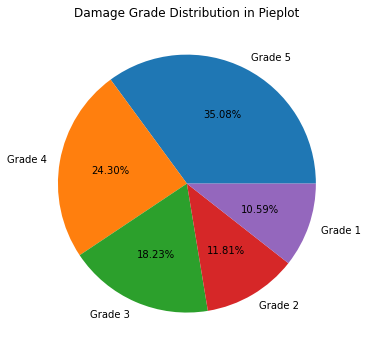

In [32]:
# Checking whether the dataset is balanced or not,

plt.figure(figsize=(10,5))

labels=["Grade 5","Grade 4","Grade 3","Grade 2","Grade 1"]
plt.pie(Raw_Data["damage_grade"].value_counts().values,labels=labels,autopct='%.2f%%')
plt.title("Damage Grade Distribution in Pieplot")
plt.tight_layout()




1.   Our Dataset is highly imbalanced
2.   We will have to balance the data before modeling








Text(0.5, 1.0, 'Distribution of Continous Features')

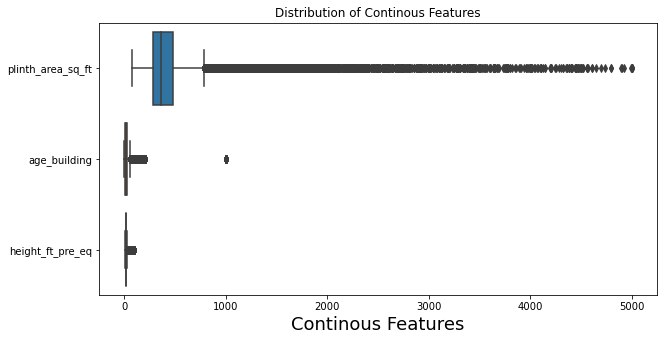

In [33]:
# Creating a new dataframe to select all the contionus column 

data_outliers = Raw_Data[["plinth_area_sq_ft","age_building","height_ft_pre_eq"]].copy()
plt.figure(figsize=(10,5))
sns.boxplot(data=data_outliers,orient="h")
plt.xlabel("Continous Features",fontsize=18)
plt.title("Distribution of Continous Features")

1. There are several outliers in these columns<br>
2. We wil deal with these in pre-processing

Text(0.5, 1.0, 'Plinth_area & Height vs Damage Grade')

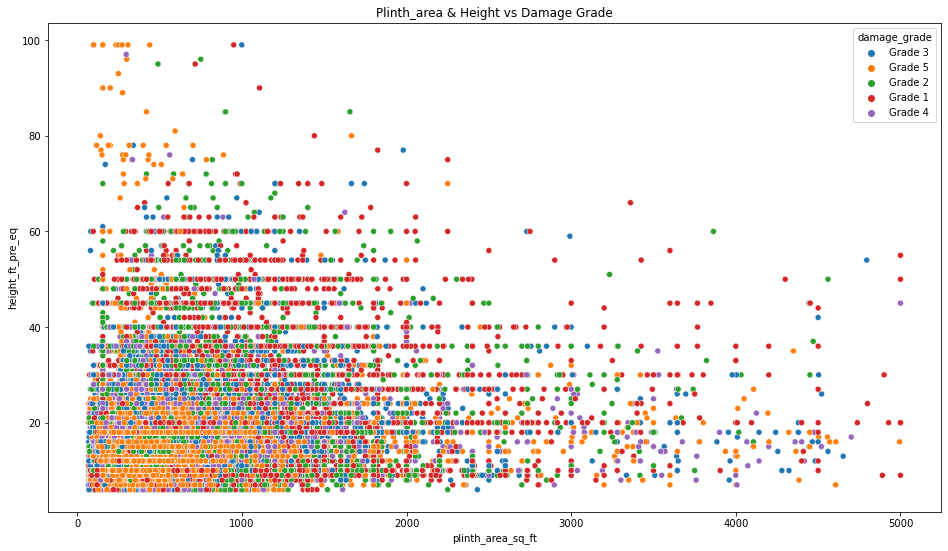

In [34]:
# Relation between Plinth Area and Height to Damage Grade

plt.figure(figsize=(16,9))
sns.scatterplot(x="plinth_area_sq_ft",y="height_ft_pre_eq",data=Raw_Data,hue="damage_grade")
plt.title("Plinth_area & Height vs Damage Grade")

1. Highest Damage is found in buildings with lesser plinth area and height.

In [35]:
# Correlation between numerical features,

temp_corr = Raw_Data.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1)

Text(0.5, 1.0, 'Correlation between Numerical Features')

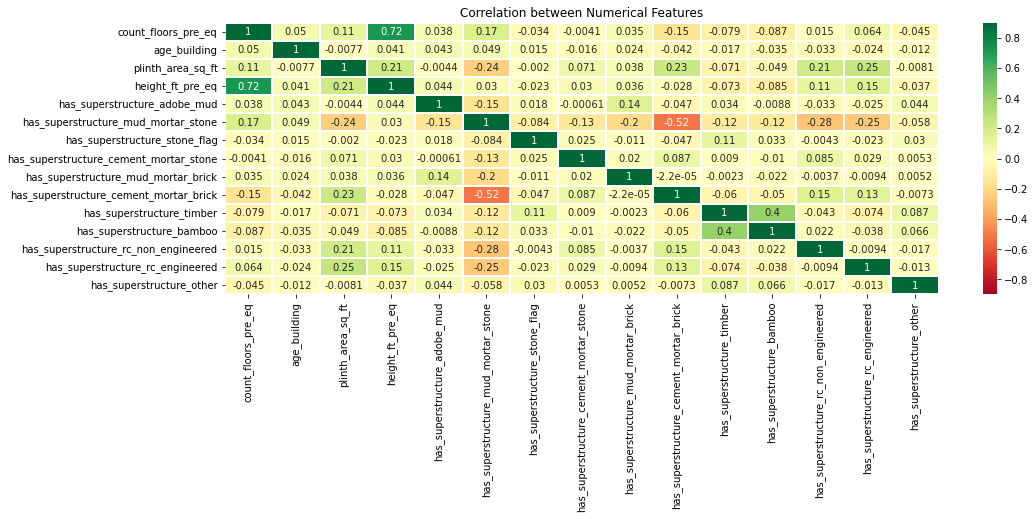

In [36]:
corr_matrix=temp_corr.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix,linewidths=0.3,cmap='RdYlGn',annot=True,vmin=-0.9,vmax=0.9)
plt.title("Correlation between Numerical Features")

1. Number of floors and height of the building has a high positive correlation, one of these columns can be dropped during preprocessing
2. There is no other significant correlation between features

C:\Users\APJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


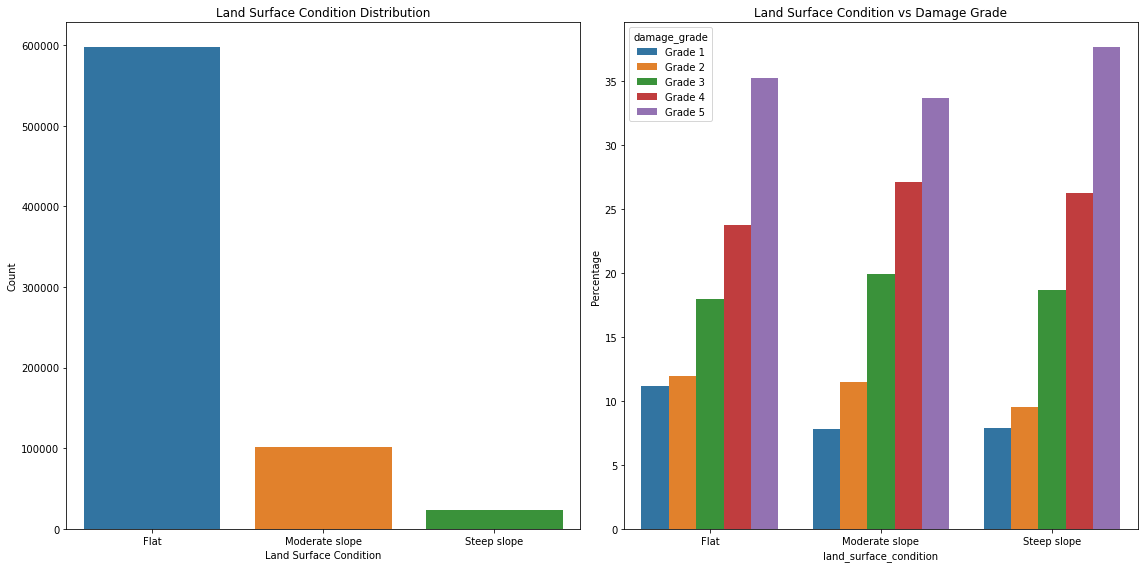

In [37]:
# Land Surface Condition vs Damage Grade

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(Raw_Data["land_surface_condition"])
plt.title("Land Surface Condition Distribution")
plt.xlabel("Land Surface Condition")
plt.ylabel("Count")


plt.subplot(1,2,2)
ax = Raw_Data.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["land_surface_condition","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='land_surface_condition',y='count',hue='damage_grade')
plt.title("Land Surface Condition vs Damage Grade") 
plt.ylabel("Percentage")                
plt.tight_layout()

1. Most Buildings are located in flat surface
2. Highest damage severity is found in steep slope land surface conditions

C:\Users\APJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


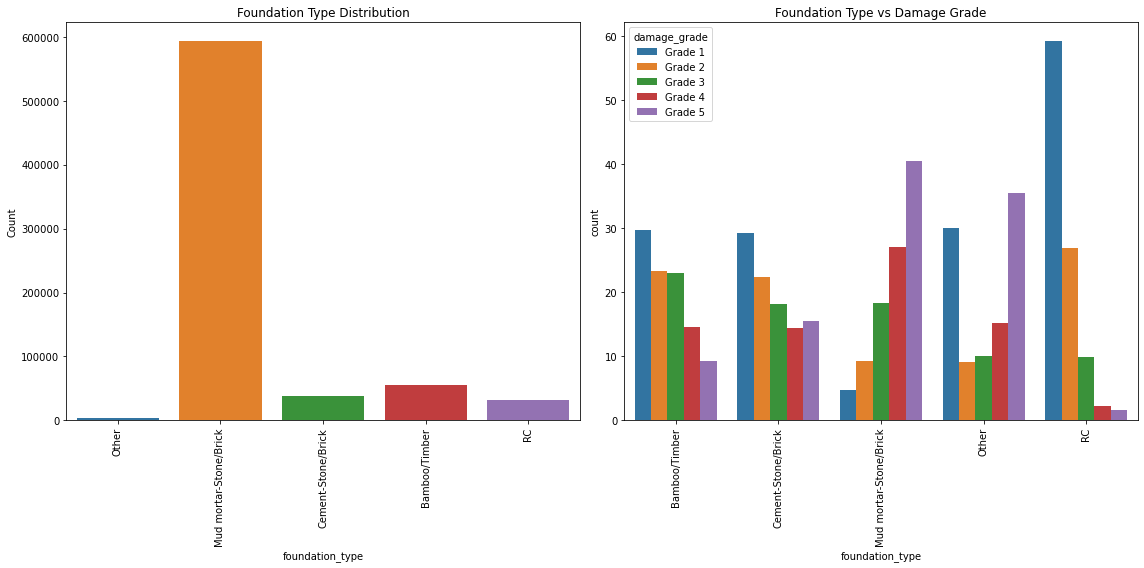

In [38]:
# Foundation Type vs Damage Grade

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(Raw_Data["foundation_type"])
plt.title("Foundation Type Distribution")
plt.xlabel("foundation_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = Raw_Data.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["foundation_type","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='foundation_type',y='count',hue='damage_grade')
plt.title("Foundation Type vs Damage Grade")       
plt.xticks(rotation=90)
plt.tight_layout()

1. Most foundation are made up of mud mortar-stone/brick
2. Highest severity is found in mud mortar stone brick foundation
3. Reinforced concrete foundation has the highest resistance against earthquake

C:\Users\APJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


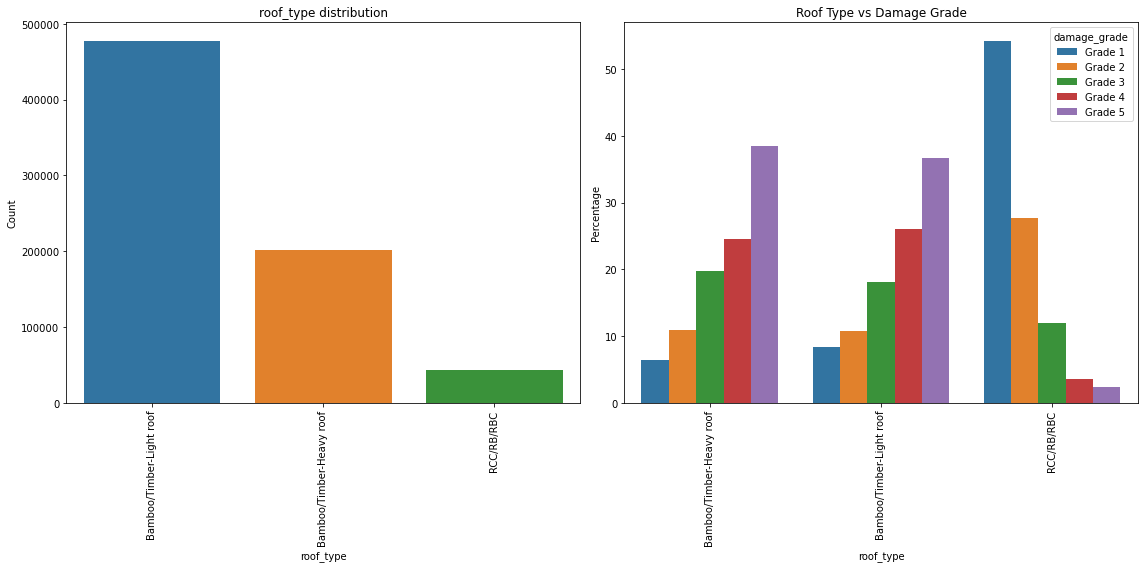

In [39]:
# Roof Type vs Damage Grade

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(Raw_Data["roof_type"])
plt.title("roof_type distribution")
plt.xlabel("roof_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = Raw_Data.groupby(['roof_type','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["roof_type","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='roof_type',y='count',hue='damage_grade')
plt.title("Roof Type vs Damage Grade")   
plt.ylabel("Percentage")    
plt.xticks(rotation=90)
plt.tight_layout()

1. Most of the roofs are made up of light and heavy bamboo
2. Both the bamboo roof types have the highest damage grade
3. Reinforced cement concrete,Reinforced brick and Reinforced brick concrete has the least effect. 

C:\Users\APJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


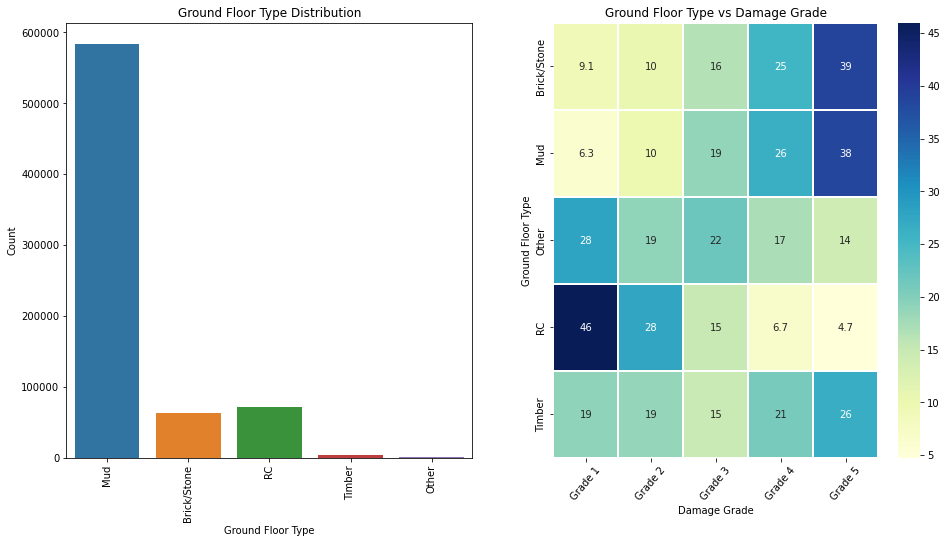

In [40]:
# Floor Type vs Damage Grade

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(Raw_Data["ground_floor_type"])
plt.title("Ground Floor Type Distribution")
plt.xlabel("Ground Floor Type")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1,2,2)

df_tmp=Raw_Data.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='Count')
#Set Index
df_tmp=df_tmp.set_index(['ground_floor_type','damage_grade'])

#Calculate the portion of Grade
df_tmp=df_tmp.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()

df_tmp=pd.pivot(df_tmp,columns='damage_grade',index='ground_floor_type',values='Count')

sns.heatmap(data=df_tmp,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.xticks(rotation=50)
plt.title("Ground Floor Type vs Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("Ground Floor Type")
plt.show()

1. Most buildings are having ground floor as mud
2. Both Mud and Brickstone has higher severity of damage
3. Reinforced concrete structures has the lowest damage

In [41]:
# Damage Grade vs Other Floor Type

df_tmp=Raw_Data.groupby(['other_floor_type','damage_grade']).size().reset_index(name='Count')
#Set Index
df_tmp=df_tmp.set_index(['other_floor_type','damage_grade'])

#Calculate the portion of Grade
df_tmp=df_tmp.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()

df_tmp=pd.pivot(df_tmp,columns='damage_grade',index='other_floor_type',values='Count')

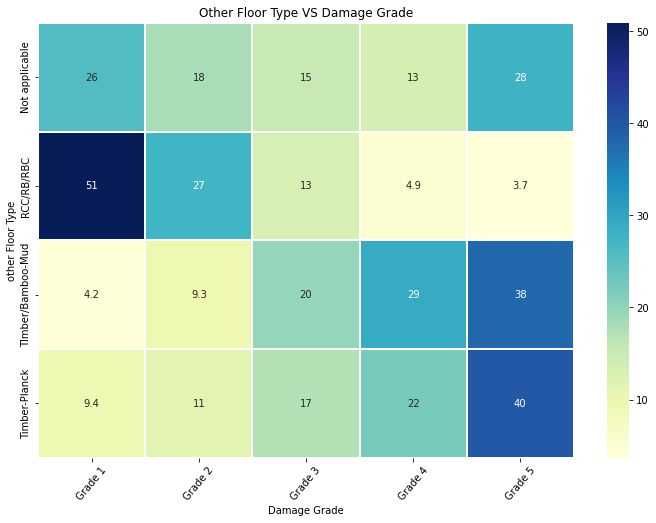

In [42]:

plt.figure(figsize=(12,8))
sns.heatmap(data=df_tmp,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.xticks(rotation=50)
plt.title("Other Floor Type VS Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("other Floor Type")
plt.show()

1. Timber and Bamboo floor types has the highest severity
2. Lowest severity of damage is found in RCC/RB/RBC

<AxesSubplot:>

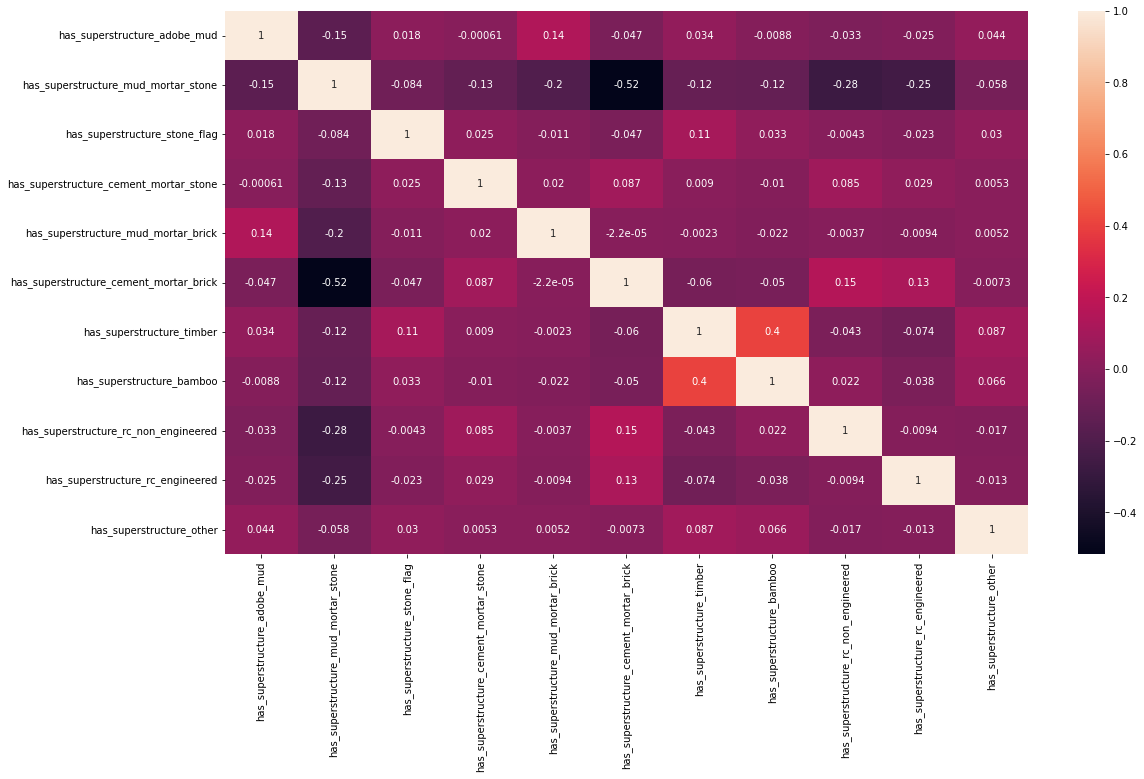

In [43]:
# Superstructure binary columns vs Damage Grade

superstructure_cols=[x for x in Raw_Data.columns if 'super' in x]
superstructure_corr=Raw_Data[superstructure_cols + ['damage_grade']].corr()

plt.figure(figsize=(18,10))
sns.heatmap(superstructure_corr,annot=True)

1. Superstructure cement mortar brick and superstructre mud mortar stone has high negative correlation
2. All the superstucture columns have weak relation with Damage Grade

## Preprocessing

### 1. Handling Outliers

In [44]:
# We will be checking for and handling the outliers in numerical columns,

### a. count_floors_pre_eq

In [45]:
Raw_Data['count_floors_pre_eq'].value_counts()

2    443678
3    155955
1    115867
4      6026
5      1554
6       331
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

In [46]:
# All the value of number of floors are realistic values for a building
# Handling outliers in this column may affect the variability of our data
# Hence we are not handling the outliers

### b. age_building

<AxesSubplot:ylabel='age_building'>

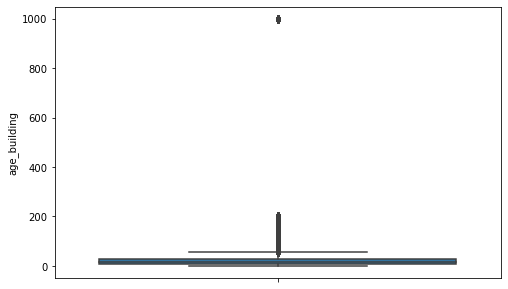

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(y=Raw_Data['age_building'],data=Raw_Data)

In [48]:
# Number of outliers in this column,

Raw_Data[Raw_Data['age_building']>300].shape

(2666, 27)

In [49]:
# We can floor these outlier values using IQR method,

Q1=Raw_Data['age_building'].quantile(0.25)
Q3=Raw_Data['age_building'].quantile(0.75)

In [50]:
print(Q1,Q3)

8.0 27.0


In [51]:
IQR=Q3-Q1
        
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)

In [52]:
print(LL,UL)

-20.5 55.5


In [53]:
Raw_Data['age_building']= np.where(Raw_Data['age_building']>UL,UL,np.where(Raw_Data['age_building']<LL,LL,
                                                                           Raw_Data['age_building']))

<AxesSubplot:ylabel='age_building'>

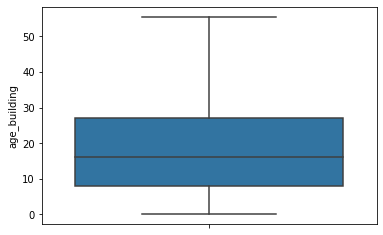

In [54]:
sns.boxplot(y=Raw_Data['age_building'],data=Raw_Data)

In [55]:
# We have successfully handled the outliers using the IQR method.

### C. Handling Outliers in height_ft_pre_eq and plinth_area_sq_ft columns

In [56]:
# Statistical summary of height and plinth area,

Raw_Data[['height_ft_pre_eq','plinth_area_sq_ft']].describe()

,height_ft_pre_eq,plinth_area_sq_ft
count,723524.000000,723524.000000
mean,16.018297,409.889257
std,5.450093,229.905046
min,6.000000,70.000000
25%,12.000000,280.000000
50%,16.000000,360.000000
75%,18.000000,480.000000
max,99.000000,5000.000000


In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

				 Distribution of Plinth Area & Height


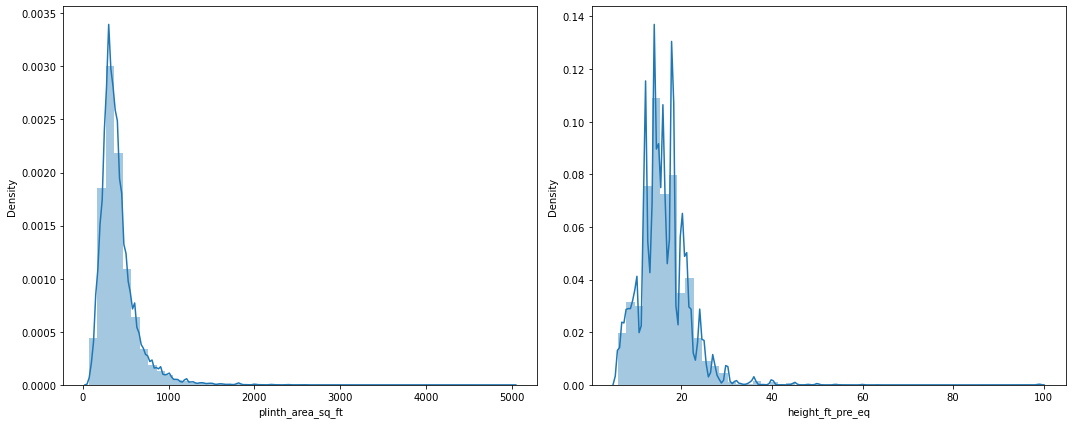

In [58]:
# Distribution of both column using distplot,

print("\t\t\t\t Distribution of Plinth Area & Height")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

				Plinth Area & Height after log tranformation


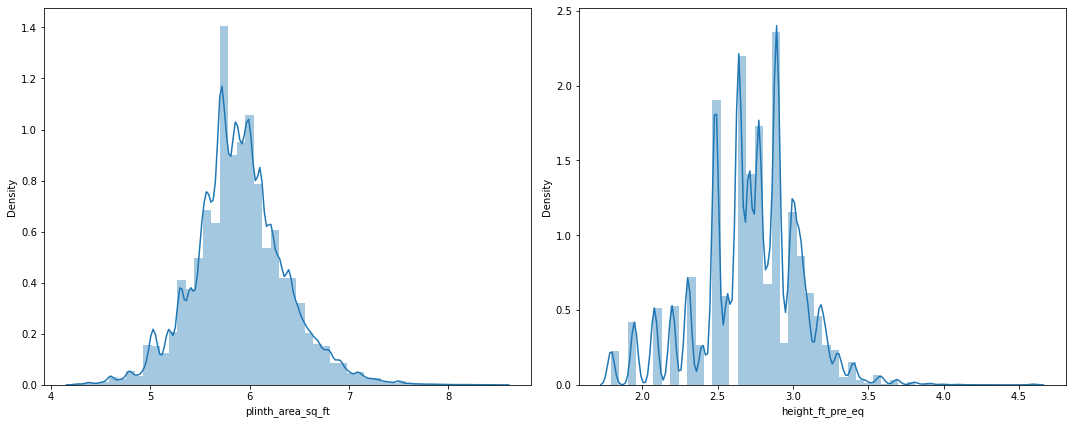

In [59]:
# Both These columns are heavily right skewed
# By using log transformation we can modify these columns to normally distributed columns,

print("\t\t\t\tPlinth Area & Height after log tranformation")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Raw_Data['plinth_area_sq_ft'] = np.log(Raw_Data['plinth_area_sq_ft'])
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
Raw_Data['height_ft_pre_eq'] = np.log(Raw_Data['height_ft_pre_eq'])
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

In [60]:
# We have corrected distribution of variables using log transformation
# We have succesfully handled the outliers in all the numerical columns  

## 3. Feature Importance

In [61]:
temporary_data = Raw_Data.copy()

In [62]:
# We can see the importance of features using Random Forest classifier,
# First we have to convert our categorical features into numerical columns using label encoder

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [63]:
lbl=LabelEncoder()
for i in ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade']:
    temporary_data[i]=lbl.fit_transform(temporary_data[i])

In [64]:
# Splitting data to X and y,

y=temporary_data["damage_grade"]
x=temporary_data.drop("damage_grade",axis=1)

In [65]:
rdm=RandomForestClassifier()
rdm.fit(x,y)
feat_importances=pd.Series(rdm.feature_importances_,index=x.columns).sort_values(ascending=False)*100

			Feature importance using Random Forest Classifier


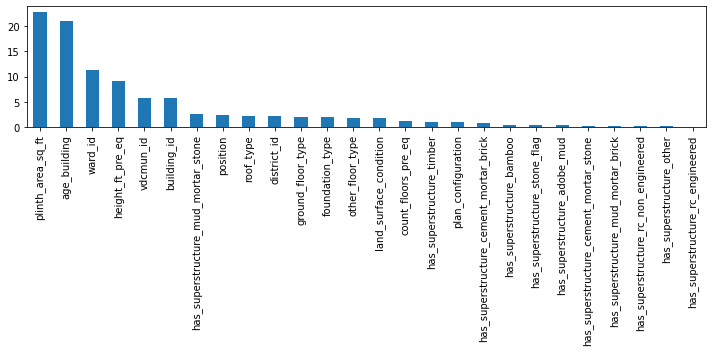

In [66]:
print("\t\t\tFeature importance using Random Forest Classifier")
plt.figure(figsize=(10,5))
feat_importances.plot(kind='bar')
plt.tight_layout()
plt.show()

In [67]:
feat_importances

plinth_area_sq_ft                         22.673416
age_building                              20.908369
ward_id                                   11.337485
height_ft_pre_eq                           9.041163
vdcmun_id                                  5.746606
building_id                                5.708708
has_superstructure_mud_mortar_stone        2.679546
position                                   2.508658
roof_type                                  2.328950
district_id                                2.287804
ground_floor_type                          2.106039
foundation_type                            2.020780
other_floor_type                           1.934901
land_surface_condition                     1.818385
count_floors_pre_eq                        1.287994
has_superstructure_timber                  1.038867
plan_configuration                         0.993322
has_superstructure_cement_mortar_brick     0.857723
has_superstructure_bamboo                  0.560361
has_superstr

In [68]:
# Using these values as a reference, we can drop columns having low feature importance

## Feature Reduction

In [69]:
# Dropping the id columns,

Raw_Data.drop(['building_id','vdcmun_id','ward_id','district_id'],axis=1,inplace=True)

In [76]:
# Dropping features with low importance and less variance

Raw_Data.drop(['has_superstructure_timber',
       'plan_configuration', 'has_superstructure_cement_mortar_brick',
       'has_superstructure_bamboo', 'has_superstructure_stone_flag',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_rc_non_engineered', 'has_superstructure_other',
       'has_superstructure_rc_engineered'],axis=1,inplace=True)

In [77]:
# checkpoint

chkpt1 = Raw_Data.copy()

In [71]:
 #Raw_Data = chkpt1.copy()

## Encoding

### Label Encoding the target variable

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Raw_Data['damage_grade'] = le.fit_transform(Raw_Data['damage_grade'])
print(le.classes_)

[0 1 2 3 4]


In [79]:
Raw_Data['damage_grade'].value_counts()

4    253777
3    175797
2    131894
1     85458
0     76598
Name: damage_grade, dtype: int64

### CatBoost Encoding other categorical columns

In [74]:
# pip install --upgrade category_encoders

In [80]:
# Splitting the datset to X and y,

X = Raw_Data.drop(['damage_grade'],axis=1)
y= Raw_Data['damage_grade']

In [81]:
# Encoding the category features using Catboost,

import category_encoders as ce
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
cbe_encoder.fit(X, y)
X = cbe_encoder.transform(X)

## Data Balancing

In [85]:
from collections import Counter

In [86]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours()
X_res, y_res = renn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 76598, 4: 32693, 3: 6553, 2: 2138, 1: 1439})


In [91]:
# Splitting the datset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=34,stratify=y_res)

## Modeling

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

## Model Evaluvation

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21257    56    68   244  1355]
 [  273   152     1     1     5]
 [  223     1   327    23    67]
 [  305     0    18  1203   440]
 [  711     0    19   126  8952]]
0.8901387221927597
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     22980
           1       0.73      0.35      0.47       432
           2       0.76      0.51      0.61       641
           3       0.75      0.61      0.68      1966
           4       0.83      0.91      0.87      9808

    accuracy                           0.89     35827
   macro avg       0.80      0.66      0.71     35827
weighted avg       0.89      0.89      0.89     35827



> The model's F1 score is 0.89